<a href="https://colab.research.google.com/github/Joanne1228-coder/House-Pricing-PREDICTION-Using-REGRESSION/blob/main/Lab_Work_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Pricing PREDICTION Using REGRESSION**

Name: Joanne Lim Zi Xuan

Matric No.: 22004882/1

Occurence: Occ 5

Lecturer: Dr. Loo Chu Kiong

# Data Analysis

**Upload Dataset from GitHub
(Save as House Pricing.csv)**

[Dataset Link](https://github.com/Joanne1228-coder/ML-Lab-Work-1/blob/main/House%20Pricing.csv)

**Import Libraries**

In [ ]:
#for Data Processing
import numpy as nm
import pandas as pd

#for Data Visualisation
import seaborn as sb
import matplotlib.pyplot as plt

#for Data Splitting and Rescalling
from sklearn.model_selection import train_test_split

#for Model Evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score

#The model segment contains the library imported for Model Building

**Load Dataset**

In [ ]:
#importing dataset
dataset = pd.read_csv('House Pricing.csv')

#prepare a copy of the original dataset for future use
cd = dataset.copy()
dataset.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


**Data Inspection**

In [ ]:
#Check dimension/shape[sample number,price+features]
dataset.shape

(545, 13)

In [ ]:
#Show variables
dataset.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
#Check the dtype of all the columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
#Description and info of dataset
dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
# Check the number of unique rows for each selection(each variable got how many different values)
dataset.nunique().sort_values()

mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
prefarea              2
furnishingstatus      3
bathrooms             4
stories               4
parking               4
bedrooms              6
price               219
area                284
dtype: int64

**Exploratory Data Analysis (EDA)**

<Figure size 800x400 with 0 Axes>

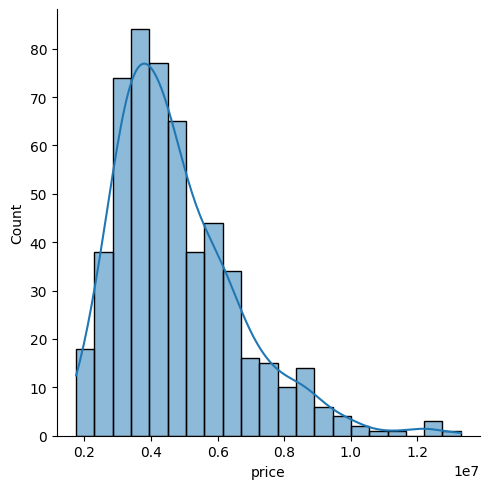

In [ ]:
#Analyse the distribution of the targeted variable
target='price'
plt.figure(figsize=[8,4])
sb.displot(data=cd, x = target, kde=True)
plt.show()

#The mode is at the forth box

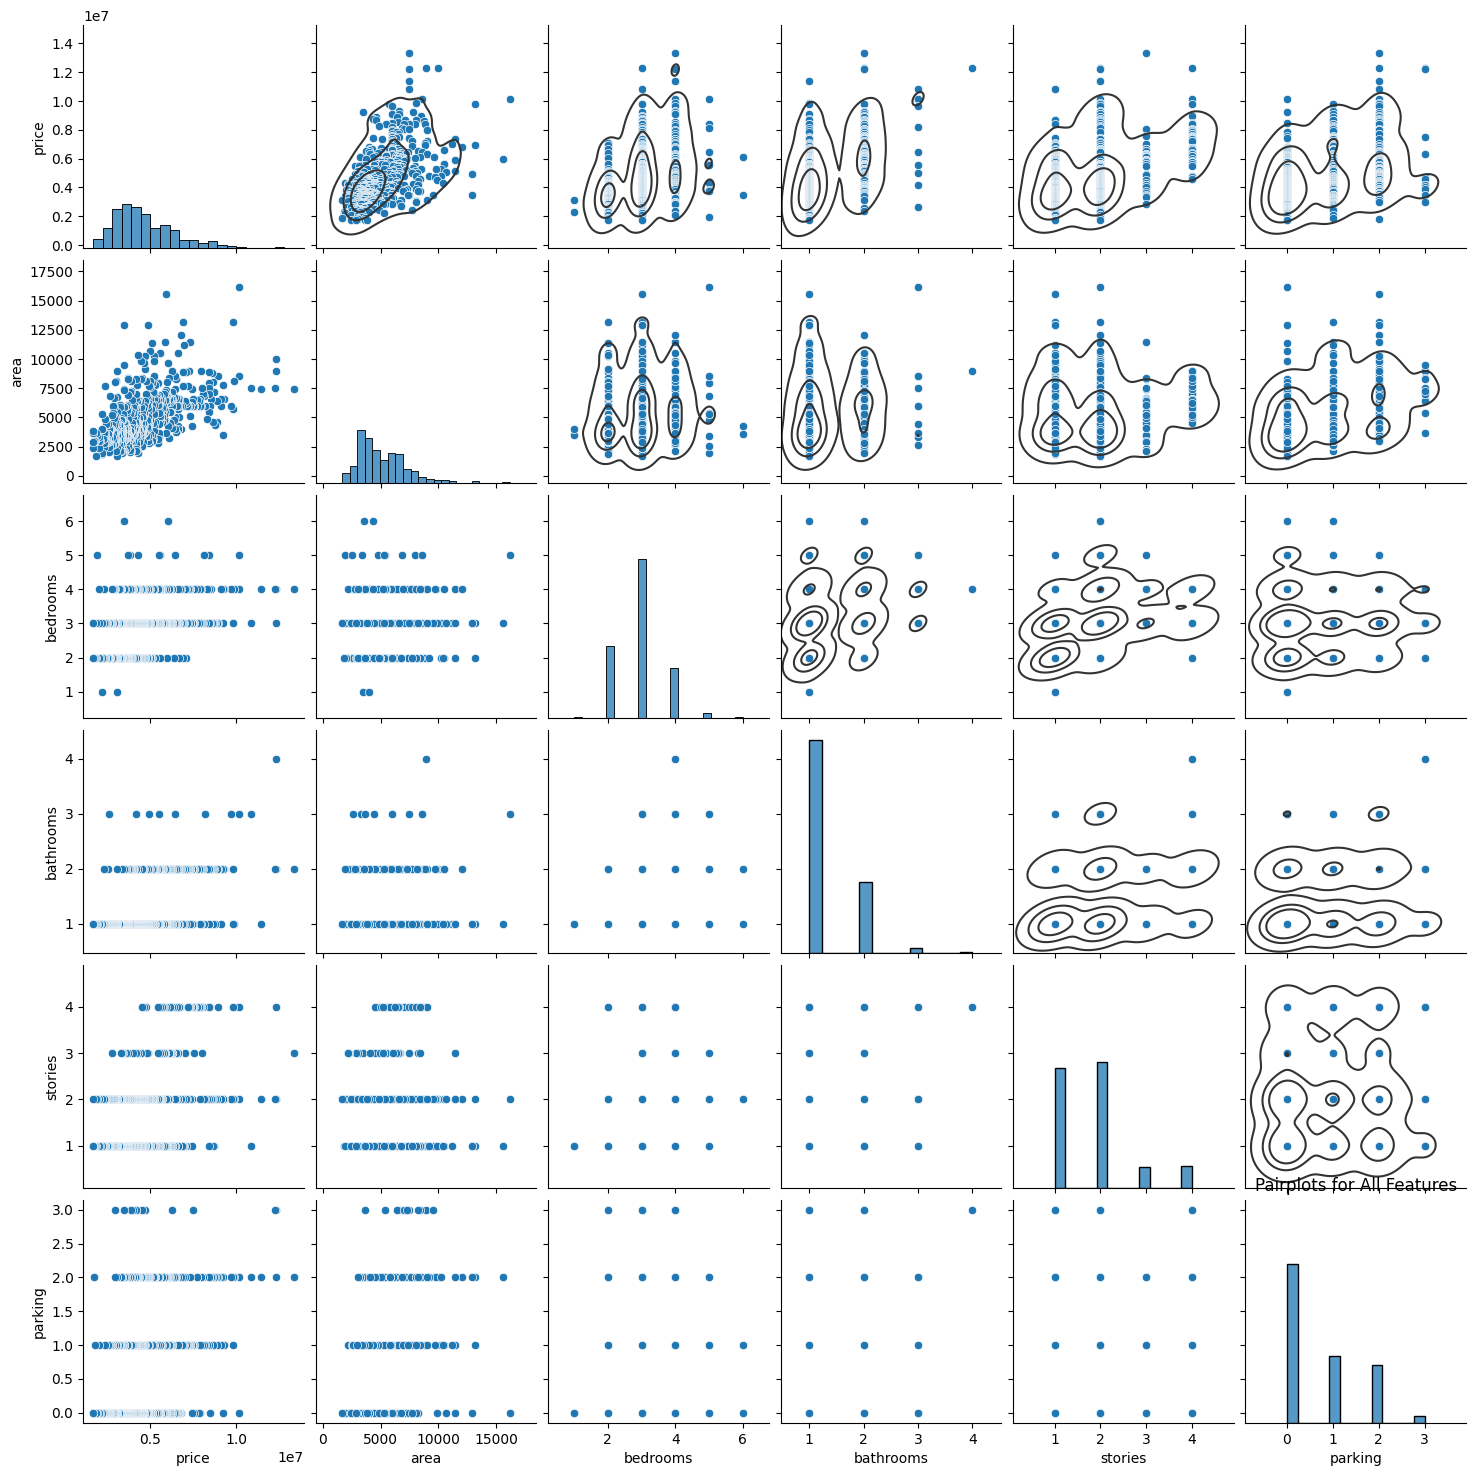

In [ ]:
#Understand the relationship between all the features
g = sb.pairplot(dataset)
plt.title('Pairplots for All Features')
g.map_upper(sb.kdeplot, levels = 4, color=".2")
plt.show()

#The correlated matrix showed that area affects the price the most by looking at its pairplot

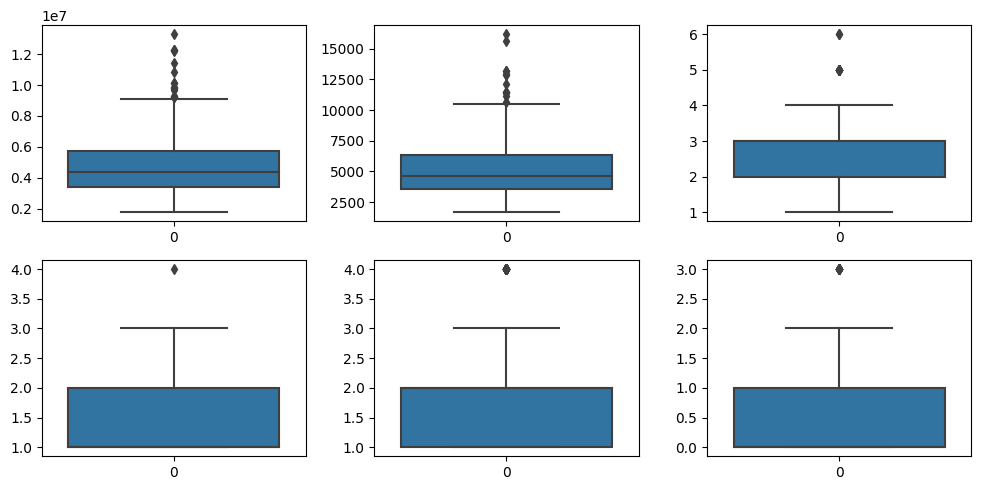

In [ ]:
#Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sb.boxplot(dataset['price'], ax = axs[0,0])
plt2 = sb.boxplot(dataset['area'], ax = axs[0,1])
plt3 = sb.boxplot(dataset['bedrooms'], ax = axs[0,2])
plt1 = sb.boxplot(dataset['bathrooms'], ax = axs[1,0])
plt2 = sb.boxplot(dataset['stories'], ax = axs[1,1])
plt3 = sb.boxplot(dataset['parking'], ax = axs[1,2])

plt.tight_layout()
#Price and area have noticable outliers

<ipython-input-57-44bc5fda4eab>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(dataset.corr())


<Axes: >

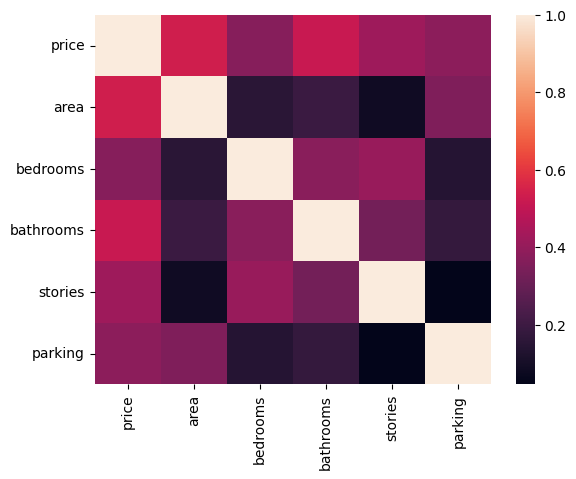

In [ ]:
#Check the correlation of data in the dataset
sb.heatmap(dataset.corr())

#All the non-categorical features are moderately correlated

# Data Preprocessing

**Data Cleaning**

In [ ]:
#Check if the dataset contains null value
dataset.isnull().sum()*100/dataset.shape[0]
#No null value means it is clean

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

**Deal with Duplicates**




In [ ]:
#Remove duplicated rows(if any)
counter=0
rs,cs = dataset.shape
datasettemp = dataset.copy()
datasettemp.drop_duplicates(inplace=True)

if(datasettemp.shape == rs,cs):
  print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates.')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-datasettemp.shape[0]}')
    dataset = datasettemp


Inference: The dataset doesn't have any duplicates.


**Handle Outlier**

Outlier Treatment
(Drop the outliers as there is sufficient data)

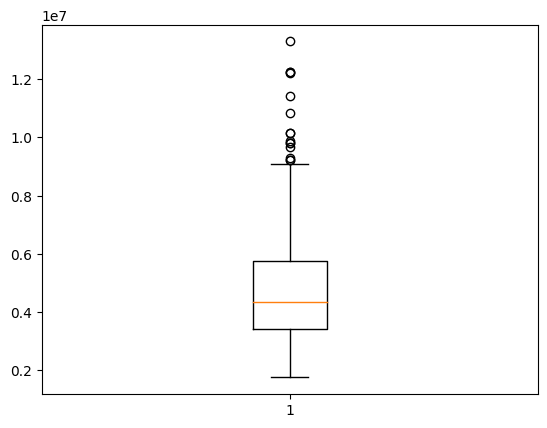

In [ ]:
# Outlier treatment for price
plt.boxplot(dataset.price)
Q1 = dataset.price.quantile(0.25)
Q3 = dataset.price.quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[(dataset.price >= Q1 - 1.5*IQR) & (dataset.price <= Q3 + 1.5*IQR)]

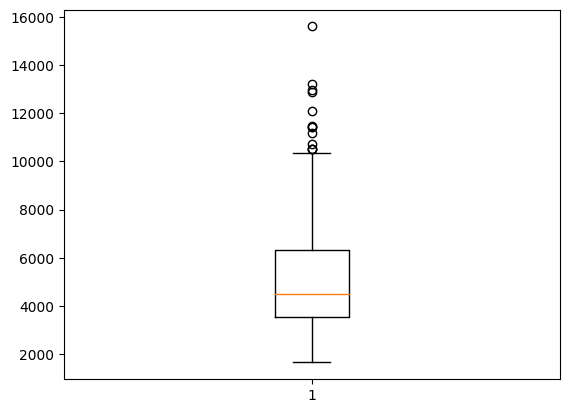

In [ ]:
# Outlier treatment for area
plt.boxplot(dataset.area)
Q1 = dataset.area.quantile(0.25)
Q3 =dataset.area.quantile(0.75)
IQR = Q3 - Q1
dataset= dataset[(dataset.area >= Q1 - 1.5*IQR) & (dataset.area <= Q3 + 1.5*IQR)]

In [ ]:
dataset.shape

(517, 13)

In [ ]:
#Reset index because removal of outlier causes the index to be out of shape
#No effect on the model as it is not a feature, but it is done for neater data
dataset = dataset.reset_index(drop=True)

**Data Encoding**

Handle categorical features

In [ ]:
#Categorical data: 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'
#Create method for encoding
#yes: 1 no: 0
def encode(dataset, column, value):
  dataset = dataset.copy()
  dataset[column] = dataset[column].apply(lambda x : 1 if x == value else 0)
  return dataset

In [ ]:
#Encode 'mainroad' data
dataset = encode(dataset,'mainroad','yes')
#Encode 'guestroom' data
dataset = encode(dataset,'guestroom','yes')
#Encode 'basement' data
dataset = encode(dataset,'basement','yes')
#Encode 'hotwaterheating' data
dataset = encode(dataset,'hotwaterheating','yes')
#Encode 'airconditioning' data
dataset = encode(dataset,'airconditioning','yes')
#Encode 'prefarea' data
dataset = encode(dataset,'prefarea','yes')

In [ ]:
#Encode 'furnishingstatus' data
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(dataset['furnishingstatus'])

In [ ]:
# Check the new dataset 'status'
status.head(10)

,furnished,semi-furnished,unfurnished
0,0,1,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,1,0
5,0,1,0
6,0,0,1
7,1,0,0
8,1,0,0
9,1,0,0


In [ ]:
# Drop the first column from status df using 'drop_first = True'
# 2nd and 3rd columns are enough to show furnishing status
# 00 for furnished, 01 for unfurnished, 10 for semi-funished

status = pd.get_dummies(dataset['furnishingstatus'], drop_first = True)

In [ ]:
#Add status to the original dataset
dataset = pd.concat([dataset, status], axis = 1)
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,1,0
1,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0,1
2,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,0,0
3,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,0,0
4,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,1,0


In [ ]:
# Drop 'furnishingstatus' as dummies have been created for it
dataset.drop(['furnishingstatus'], axis = 1, inplace = True)
#Check the head of the altered dataset to make sure furnishing status has been removed
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
1,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
2,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
3,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
4,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


In [ ]:
#Show dataset after all categorical variable are encoded
dataset.shape

(517, 14)

In [ ]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
1,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
2,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
3,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
4,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


**Feature Scaling**

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# #Add a new column 'id' to the dataframe
# dataset['id'] = range(len(dataset))

# #Scale the numerical columns
# scaler = MinMaxScaler()
# num_cols = ['price','area','bedrooms','bathrooms','stories','parking']
# dataset[num_cols] = scaler.fit_transform(dataset[num_cols])

# #Reorder ID column as the first column
# cols = list(dataset.columns)
# cols = cols [:-1]
# dataset = dataset[cols]
# dataset = dataset.reset_index(drop = True)
# dataset.head()

**Data Normalisation**

Formula: x' = (x-min)/range

In [ ]:
# Only normalise non-categorical features
num_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
dataset[num_cols]=dataset[num_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,1.000000,0.499426,0.6,0.0,0.333333,1,0,1,0,0,0.666667,0,1,0
1,1.000000,0.568312,0.6,0.5,0.333333,1,1,1,0,1,0.333333,1,0,1
2,0.980952,0.786452,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
3,0.971429,0.338691,0.4,0.5,0.333333,1,1,0,0,1,0.666667,0,0,0
4,0.966667,0.547646,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0


In [ ]:
dataset.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,0.383520,0.371999,0.388395,0.130561,0.264990,0.851064,0.177950,0.346228,0.042553,0.307544,0.217924,0.216634,0.415861,0.338491
std,0.216983,0.204268,0.146340,0.232684,0.288402,0.356370,0.382841,0.476228,0.202043,0.461923,0.281127,0.412350,0.493347,0.473655
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223810,0.214696,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.338095,0.327210,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.514286,0.505166,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Split data into training and testing sets**

In [ ]:
#copy dataset to df so that we can keep the orginal dataset
ds = dataset.copy()

# Specify this so that the train and test data set always have the same rows, respectively
nm.random.seed(0)
ds_train, ds_test = train_test_split(ds, train_size = 0.7, test_size = 0.3, random_state = 42)


**Display Correlation Matrix**

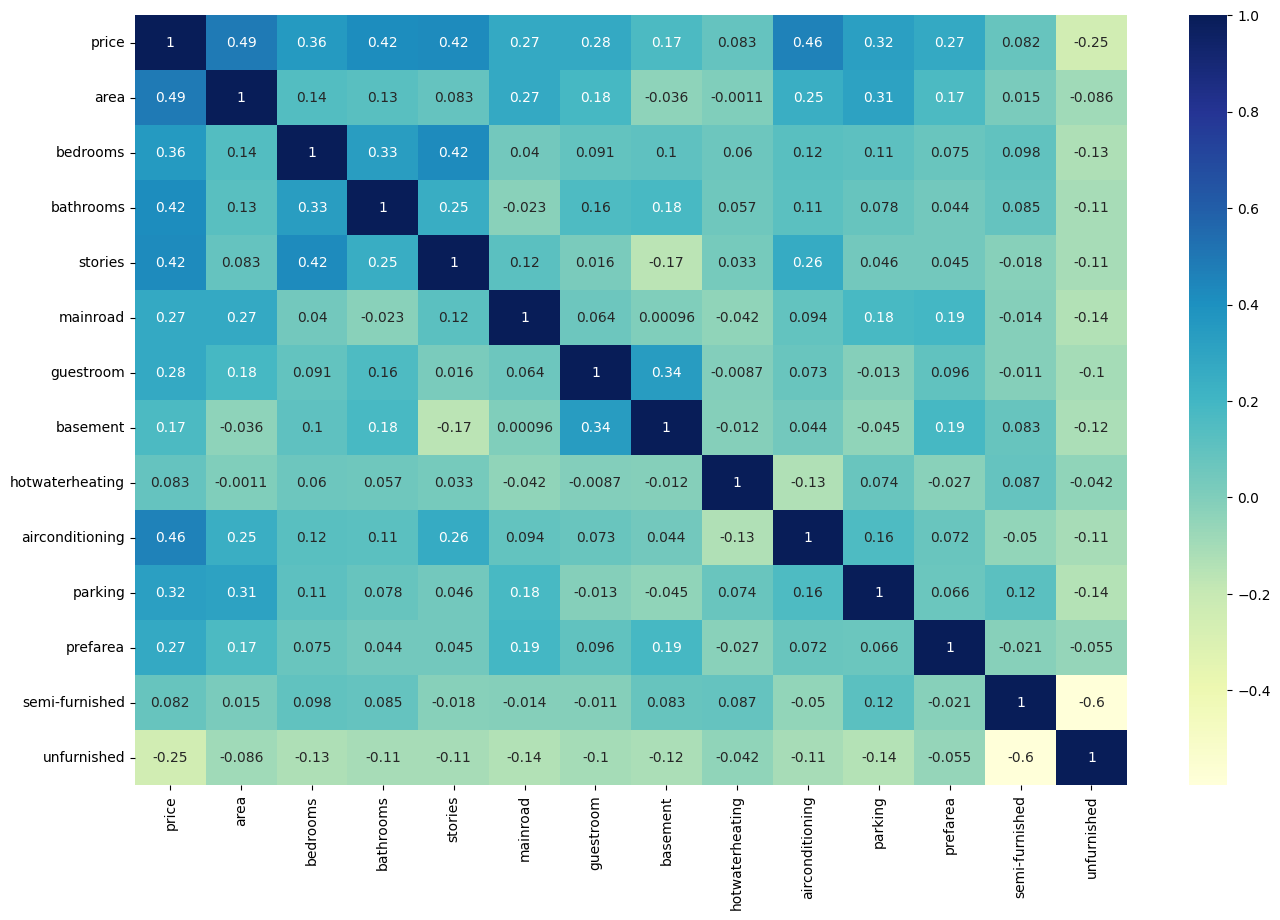

In [ ]:
#Check the correlation coefficients of the training data to see which variables are highly correlated
#For feature extraction purpose
plt.figure(figsize = (16, 10))
sb.heatmap(ds_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#Area is strongly correlated to price

In [ ]:
ds_train.to_csv('Cleaned Training Set',index = 'False')
ds_test.to_csv('Cleaned Test Set',index = 'False')

# **Regression Model Development**

**Split training data into set X and set Y for model building**

In [ ]:
#Divide ds_train into x_train and y_train (with normalisation)
#x_train: all independent variables
#y_train: dependent varible(price)
x_train = ds_train.drop(['price'], axis = 1)
y_train = ds_train['price']

**Model Building**

Multiple Linear Regression

In [ ]:
#Fit Multiple Linear Regression to the training sets(with normalisation)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

#To predict train price, for evaluation of overfitting
trainPred = regressor.predict(x_train)

# **Model Evaluation**

**Testing**

In [ ]:
#Split ds_test into x_test and y_test(with normalisation)
#x_test: all independent variables
#y_test: dependent variable(price), actual value for MSE

x_test=ds_test.drop(['price'],axis=1)
y_test=ds_test['price']

# to output predicted test price
testPred = regressor.predict(x_test)

**Display Coefficient and Intercept**

In [ ]:
#Check the current coefficient
print("Coefficient: \n",regressor.coef_)
print("\n")

#Check the intercept
print("Intercept: \n",regressor.intercept_)


Coefficient: 
 [ 0.27896894  0.07095886  0.19395422  0.17610498  0.05204177  0.05937025
  0.04366858  0.08494816  0.11419642  0.0985823   0.06607403 -0.00107411
 -0.03524903]


Intercept: 
 0.04420808070763843


**Residual Analysis of Training Data**

In [ ]:
#Calculate residual
residual = y_train - trainPred

Text(0.5, 9.444444444444438, 'Errors')

<Figure size 640x480 with 0 Axes>

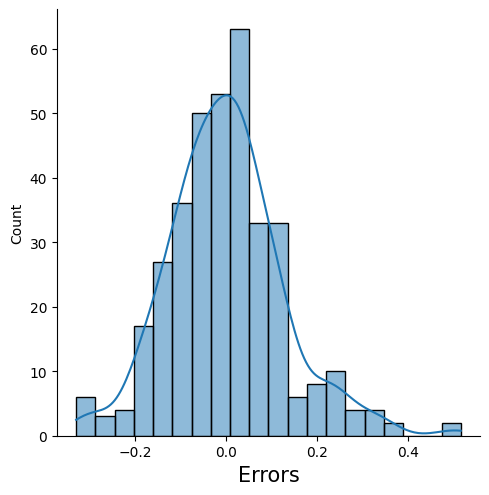

In [ ]:
#Error Term Graph
fig = plt.figure()
sb.displot((y_train - trainPred), kde=True, bins=20)
#sb.distplot((y_train - trainPred), bins = 20)
plt.xlabel('Errors', fontsize = 15)  # x-label

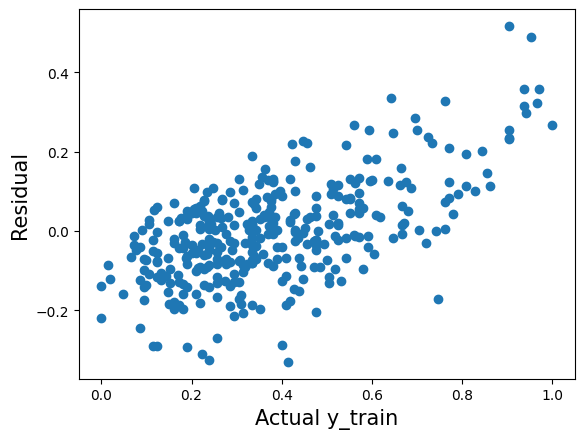

In [ ]:
plt.scatter(y_train, residual)
# x-label
plt.xlabel('Actual y_train', fontsize = 15)
# y-label
plt.ylabel('Residual', fontsize = 15)
plt.show()

**Comparison between Training Set and Testing Set**

In [ ]:
#Check evaluation metrics for Training Set
print('---------------------------------------------------')
print('Training Set Metrics')
print('---------------------------------------------------')
print('R2-Score                       :',round(r2_score(y_train, trainPred),15))
print('Residual Sum of Squares (RSS)  :',round(nm.sum(nm.square(y_train - trainPred)),15))
print('Mean Squared Error (MSE)       :',round(mean_squared_error(y_train, trainPred),15))
print('Root Mean Squared Error (RMSE) :',round(nm.sqrt(mean_squared_error(y_train, trainPred)),15))
print('---------------------------------------------------')
print("\n")
#Check evaluation metrics for Testing Set
print('---------------------------------------------------')
print('Testing Set Metrics')
print('---------------------------------------------------')
print('R2-Score                       :',round(r2_score(y_test, testPred),15))
print('Residual Sum of Squares (RSS)  :',round(nm.sum(nm.square(y_test - testPred)),15))
print('Mean Squared Error (MSE)       :',round(mean_squared_error(y_test, testPred),15))
print('Root Mean Squared Error (RMSE) :',round(nm.sqrt(mean_squared_error(y_test, testPred)),15))
print('---------------------------------------------------')

---------------------------------------------------
Training Set Metrics
---------------------------------------------------
R2-Score                       : 0.633740768295456
Residual Sum of Squares (RSS)  : 5.751040481223631
Mean Squared Error (MSE)       : 0.015930860058791
Root Mean Squared Error (RMSE) : 0.12621751090396
---------------------------------------------------


---------------------------------------------------
Testing Set Metrics
---------------------------------------------------
R2-Score                       : 0.71012268320652
Residual Sum of Squares (RSS)  : 2.471111330687722
Mean Squared Error (MSE)       : 0.015840457247998
Root Mean Squared Error (RMSE) : 0.125858878304227
---------------------------------------------------


**Result Visualisation**

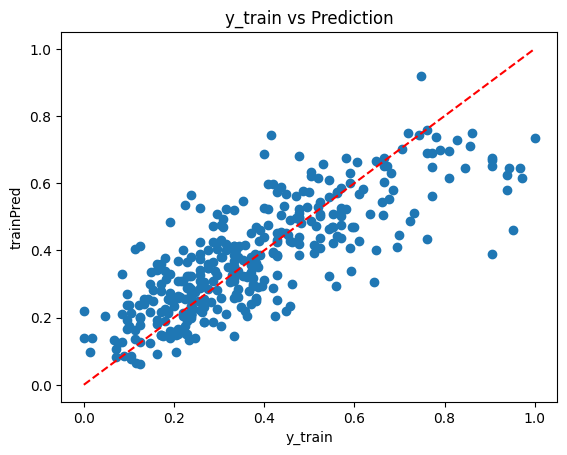

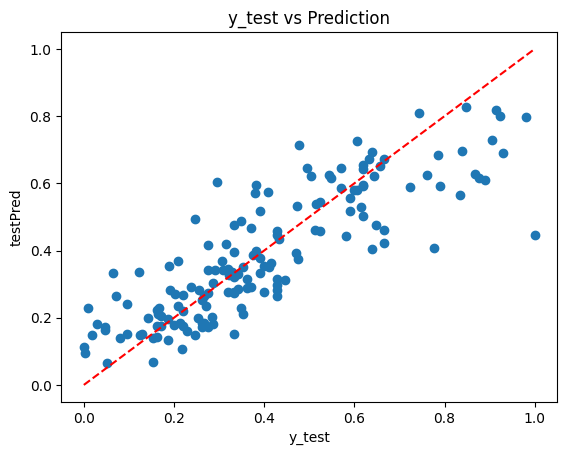

In [ ]:
#To show actual y vs predicted y
#To show the relationship between the actual and predicted price for training
plt.scatter(y_train, trainPred)
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()], 'r--')
plt.title('y_train vs Prediction')
plt.xlabel('y_train')
plt.ylabel('trainPred')
plt.show()
print("\n")

#To show the relationship between the  actual and predicted price for testing
plt.scatter(y_test, testPred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r--')
plt.title('y_test vs Prediction')
plt.xlabel('y_test')
plt.ylabel('testPred')
plt.show()

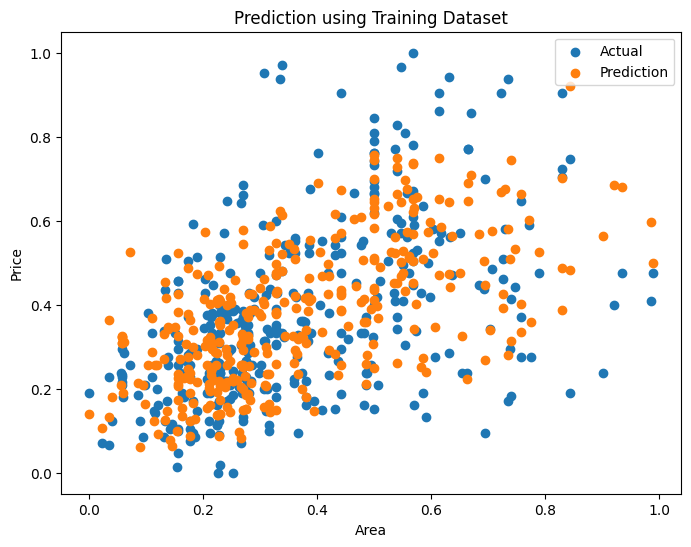

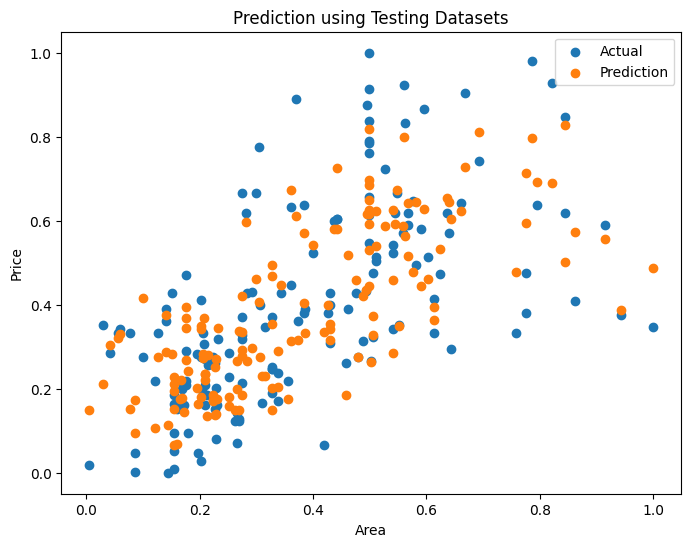

In [ ]:
#To show the scatter plot of the actual data and the prediction on the same plane for easy visualisation
#For Training Set
plt.figure(figsize=[8,6])
plt.title('Prediction using Training Dataset')
plt.scatter(y = y_train, x = x_train['area'], label = 'Actual')
plt.scatter(y = trainPred, x = x_train['area'], label = 'Prediction')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()
print("\n")

plt.figure(figsize=[8,6])
plt.title('Prediction using Testing Datasets')
plt.scatter(y= y_test, x = x_test['area'], label = 'Actual')
plt.scatter(y = testPred, x= x_test['area'], label='Prediction')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()

**Learning Curve**

Check whether overfitting/underfitting occurs in the model

Plain model

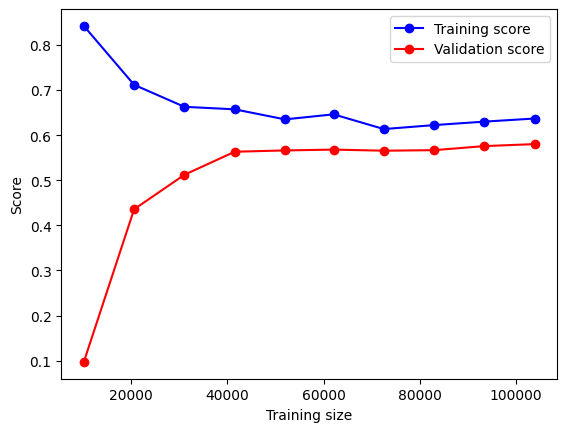

In [ ]:
#Training set
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator = regressor, X = x_train, y = y_train, train_sizes = nm.linspace(0.1, 1.0, 10), cv=5)
train_sizes_abs = nm.round(train_sizes * len(x_train))

plt.plot(train_sizes_abs, nm.mean(train_scores, axis=1), 'bo-', label = 'Training score')
plt.plot(train_sizes_abs, nm.mean(test_scores, axis=1), 'ro-', label = 'Validation score')

plt.xlabel('Training size')
plt.ylabel('Score')
plt.legend(loc = 'best')
plt.show()

**Hyperparameter Tuning**

Lasso (L1 Regularisation + Grid Search CV)

In [ ]:
#Carry out fine tuning with L1 regularisation
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

# Declare L1 for Lasso model
L1 = linear_model.Lasso()

#State a list of alpha paramater for Grid Search CV
params = {'alpha': [0.00001,0.0001,0.00059,0.0006,0.00063,0.0007,0.001,0.01, 0.1,0.3, 1, 10,100,1000]}
L1_search = GridSearchCV(L1, param_grid = params, scoring='r2')
L1_search.fit(x_train, y_train)

# Get the best hyperparameters and fit the model
best_params = L1_search.best_params_
L1.set_params(**best_params).fit(x_train, y_train)

#Predict the price for training and testing with newly fitted model
predLsTrain = L1.predict(x_train)
predLsTest = L1.predict(x_test)

#This method will get the same output as a bove.
#I predicted using L1 because Lasso is my optimisation model while grid search helps me to find the best parameter

#Calculate the best mse,rmse,mae,r2
mse = mean_squared_error(y_test, predLsTest)
rmse = nm.sqrt(mse)
mae = nm.mean(nm.abs(y_test - predLsTest))
r2 = L1_search.score(x_test, y_test)

#Display all
print('After Lasso (L1 Regularisation)')
print('Best alpha:', L1_search.best_params_['alpha'])
print(f'Best MSE: {mse:.15f}')
print(f'Best RMSE: {rmse:.15f}')
print(f'Best MAE: {mae:.15f}')
print(f'Best R-squared: {r2:.15f}')

#The best alpha is 0.00063 for this model.
#The value of R2 score decreases slightly because the L1 regularisation is expected to reduce some of the features (e.g.: coefficient decrease to 0) due to introduction of penalty term
#L1 regularisation is known for overcoming overfitting so with lower R2 might work better


After Lasso (L1 Regularisation)
Best alpha: 0.00063
Best MSE: 0.015955984015493
Best RMSE: 0.126316998125719
Best MAE: 0.094064830329279
Best R-squared: 0.708008565611624


**Evaluation after L1 Regularisation**

In [ ]:
#Check the evaluation metrics for training set (Optimisation)
print('L1 Regularisation(Lasso) + Grid Search CV')
print('---------------------------------------------------')
print('Training Set Metrics')
print('---------------------------------------------------')
print('R2-Score                       :',round(r2_score(y_train, predLsTrain),15))
print('Residual Sum of Squares (RSS)  :',round(nm.sum(nm.square(y_train - predLsTrain)),15))
print('Mean Squared Error (MSE)       :',round(mean_squared_error(y_train, predLsTrain),15))
print('Root Mean Squared Error (RMSE) :',round(nm.sqrt(mean_squared_error(y_train, predLsTrain)),15))
print('---------------------------------------------------')
print("\n")
#Check evaluation metrics for Testing Set(optimization with L1 regularization)
print('---------------------------------------------------')
print('Testing Set Metrics')
print('---------------------------------------------------')
print('R2-Score                       :',round(r2_score(y_test, predLsTest),15))
print('Residual Sum of Squares (RSS)  :',round(nm.sum(nm.square(y_test - predLsTest)),15))
print('Mean Squared Error (MSE)       :',round(mean_squared_error(y_test, predLsTest),15))
print('Root Mean Squared Error (RMSE) :',round(nm.sqrt(mean_squared_error(y_test, predLsTest)),15))
print('---------------------------------------------------')

L1 Regularisation(Lasso) + Grid Search CV
---------------------------------------------------
Training Set Metrics
---------------------------------------------------
R2-Score                       : 0.632893667075626
Residual Sum of Squares (RSS)  : 5.764341752523377
Mean Squared Error (MSE)       : 0.01596770568566
Root Mean Squared Error (RMSE) : 0.12636338744138
---------------------------------------------------


---------------------------------------------------
Testing Set Metrics
---------------------------------------------------
R2-Score                       : 0.708008565611624
Residual Sum of Squares (RSS)  : 2.489133506416896
Mean Squared Error (MSE)       : 0.015955984015493
Root Mean Squared Error (RMSE) : 0.126316998125719
---------------------------------------------------


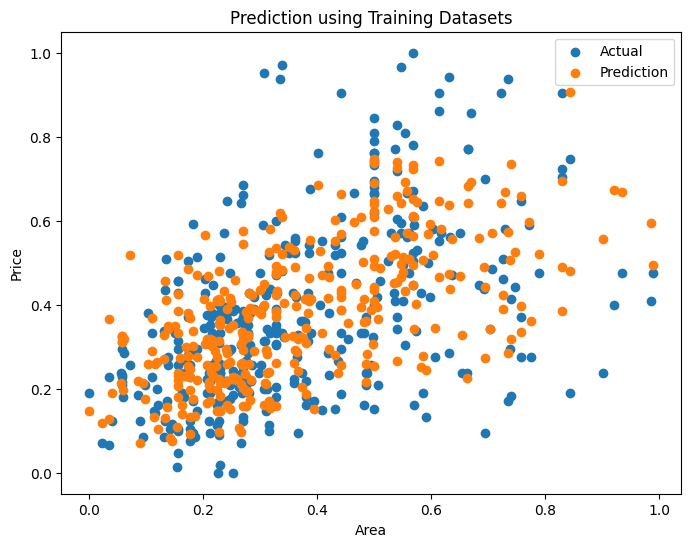

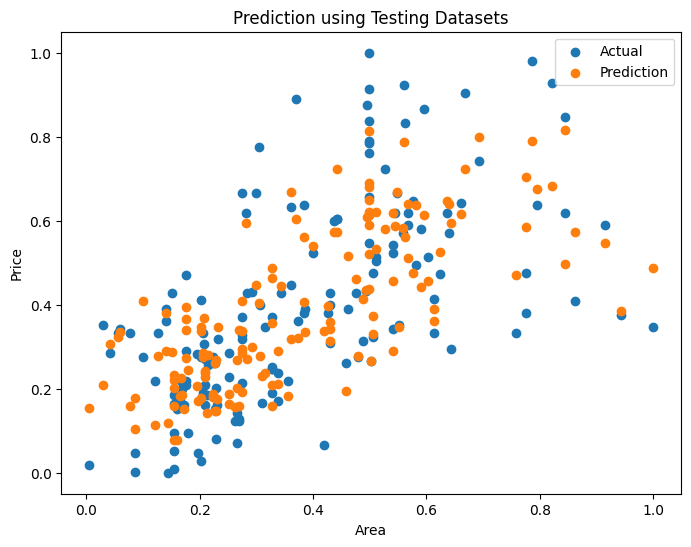

In [ ]:
#Scatter plot to see the comparison between the actual and predicted value after optimisation of hyperparameter
#Training set (L1 Regularisation + Grid Search CV)
plt.figure(figsize=[8,6])
plt.title('Prediction using Training Datasets')
plt.scatter(y = y_train, x = x_train['area'], label='Actual')
plt.scatter(y = predLsTrain, x = x_train['area'], label='Prediction')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()
print('\n')

#Testing set (L1 Regularisation + Grid Search CV)
plt.figure(figsize=[8,6])
plt.title('Prediction using Testing Datasets')
plt.scatter(y = y_test, x = x_test['area'], label='Actual')
plt.scatter(y = predLsTest, x = x_test['area'], label='Prediction')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()

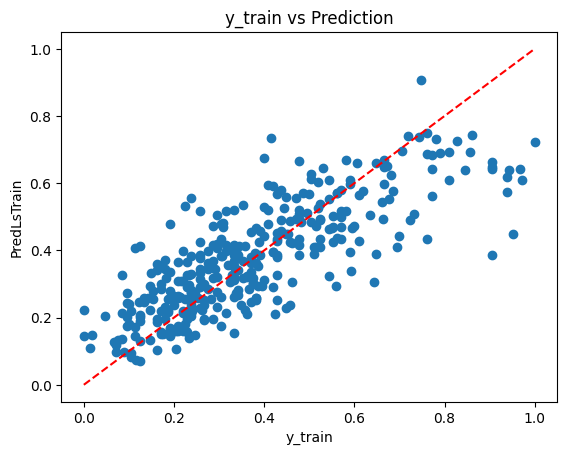

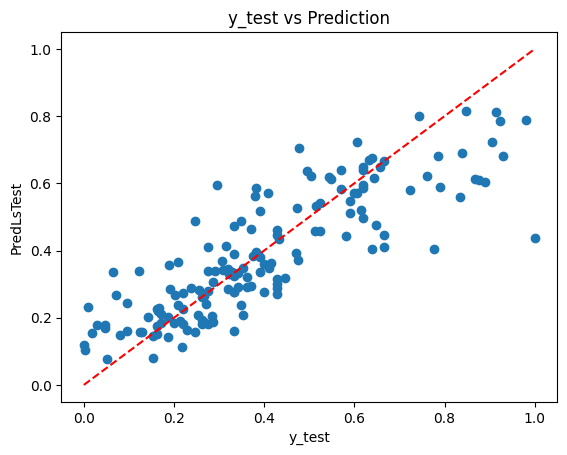

In [ ]:
#To show actual y vs predicted y(L1 Regularisation + Grid Search CV)
#To show the relationship between the actual and predicted price for training
plt.scatter(y_train, predLsTrain)
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()], 'r--')
plt.title('y_train vs Prediction')
plt.xlabel('y_train')
plt.ylabel('PredLsTrain')
plt.show()
print("\n")

#To show relation between actual and predicted price for testing
plt.scatter(y_test,predLsTest)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r--')
plt.title('y_test vs Prediction')
plt.xlabel('y_test')
plt.ylabel('PredLsTest')
plt.show()

**Ridge (L2 Regularisation) + Grid Search CV**

In [ ]:
#L2 regularisation + Grid Search CV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
params = {'alpha': [0.001, 0.01, 0.1,0.09, 1,1.000000000007,1.000000099999, 5,10, 100,1000]}

#Create the linear regression model with Ridge regularisation
L2 = Ridge()

# Use grid search to find the best hyperparameters
L2_search = GridSearchCV(L2, params, cv = 5, scoring = 'r2')
L2_search.fit(x_train, y_train)

# Get the best hyperparameters and fit the model
best_params = L2_search.best_params_
L2.set_params(**best_params).fit(x_train, y_train)

# Evaluate the model on the test set
predRgTrain = L2.predict(x_train)
predRgTest = L2.predict(x_test)

#Get best mse,rmse,mae.r2
mse = mean_squared_error(y_test, predRgTest)
rmse = nm.sqrt(mse)
mae = nm.mean(nm.abs(y_test - predRgTest))
r2 = L2.score(x_test, y_test)

print('After Ridge (L2 Regularisation)')
print(f'Best hyperparameters: {best_params}')
print(f'Best test MSE: {mse:.15f}')
print(f'Best test RMSE: {rmse:.15f}')
print(f'Best test MAE: {mae:.15f}')
print(f'Best test R-squared: {r2:.15f}')

After Ridge (L2 Regularisation)
Best hyperparameters: {'alpha': 1.000000099999}
Best test MSE: 0.015978434144051
Best test RMSE: 0.126405831131523
Best test MAE: 0.094430920105560
Best test R-squared: 0.707597732582866


**Evaluation after L2 Regularisation**

In [ ]:
#Check the evaluation metrics for training set (L2 Regularisation + Grid Search CV)
print('L2 Regularization(Ridge) + Grid Search CV')
print('---------------------------------------------------')
print('Training Set Metrics')
print('---------------------------------------------------')
print('R2-Score                       :',round(r2_score(y_train, predRgTrain),15))
print('Residual Sum of Squares (RSS)  :',round(nm.sum(nm.square(y_train - predRgTrain)),15))
print('Mean Squared Error (MSE)       :',round(mean_squared_error(y_train, predRgTrain),15))
print('Root Mean Squared Error (RMSE) :',round(nm.sqrt(mean_squared_error(y_train, predRgTrain)),15))
print('---------------------------------------------------')
print("\n")
#Check evaluation metrics for testing set(L2 Regularisation + Grid Search CV))
print('---------------------------------------------------')
print('Testing Set Metrics')
print('---------------------------------------------------')
print('R2-Score                       :',round(r2_score(y_test, predRgTest),15))
print('Residual Sum of Squares (RSS)  :',round(nm.sum(nm.square(y_test-predRgTest)),15))
print('Mean Squared Error (MSE)       :',round(mean_squared_error(y_test, predRgTest),15))
print('Root Mean Squared Error (RMSE) :',round(nm.sqrt(mean_squared_error(y_test, predRgTest)),15))
print('---------------------------------------------------')

L2 Regularization(Ridge) + Grid Search CV
---------------------------------------------------
Training Set Metrics
---------------------------------------------------
R2-Score                       : 0.633305077895803
Residual Sum of Squares (RSS)  : 5.757881737112312
Mean Squared Error (MSE)       : 0.015949810906128
Root Mean Squared Error (RMSE) : 0.126292560771125
---------------------------------------------------


---------------------------------------------------
Testing Set Metrics
---------------------------------------------------
R2-Score                       : 0.707597732582866
Residual Sum of Squares (RSS)  : 2.492635726471964
Mean Squared Error (MSE)       : 0.015978434144051
Root Mean Squared Error (RMSE) : 0.126405831131523
---------------------------------------------------


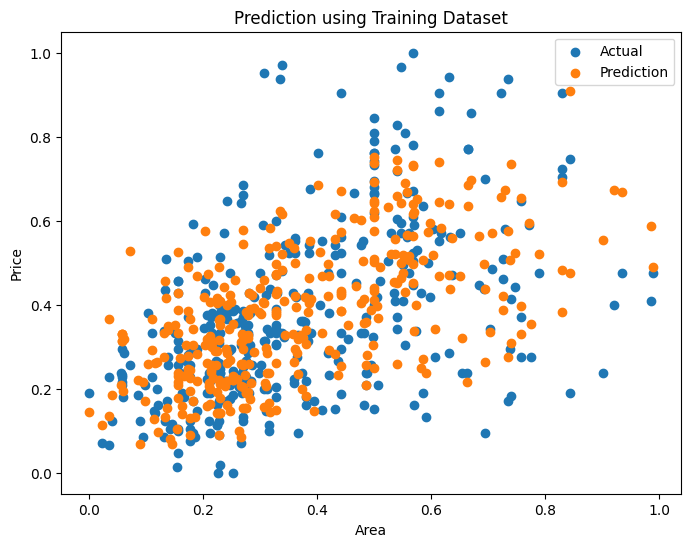

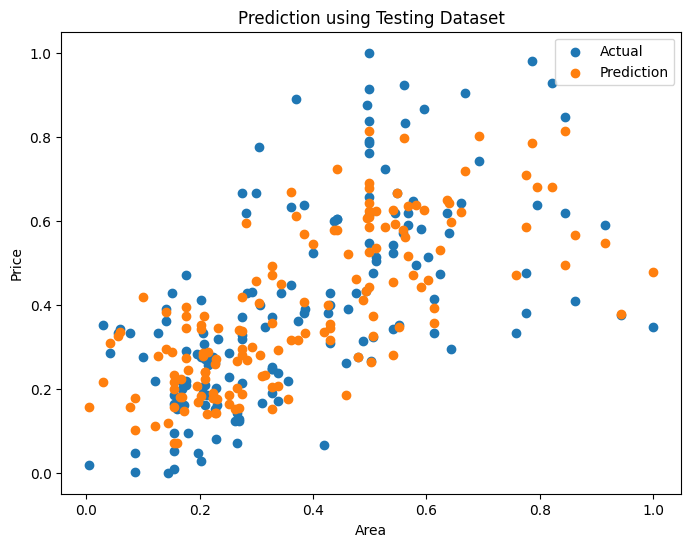

In [ ]:
#Scatter plot to see the comparison of actual and predicted value after optimisation of hyperparameter
#Training set (L2 Regularisation + Grid Search CV)
plt.figure(figsize=[8,6])
plt.title('Prediction using Training Dataset')
plt.scatter(y = y_train, x = x_train['area'], label='Actual')
plt.scatter(y = predRgTrain, x = x_train['area'], label='Prediction')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()

print('\n')

#Testing set (L2 Regularisation + Grid Search CV)
plt.figure(figsize=[8,6])
plt.title('Prediction using Testing Dataset')
plt.scatter(y = y_test, x = x_test['area'], label='Actual')
plt.scatter(y = predRgTest, x = x_test['area'], label='Prediction')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()

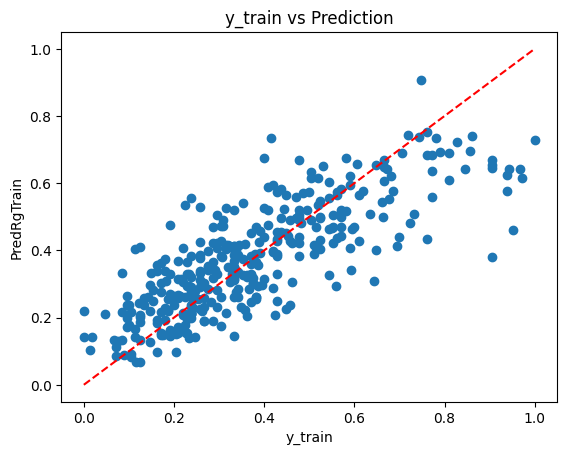

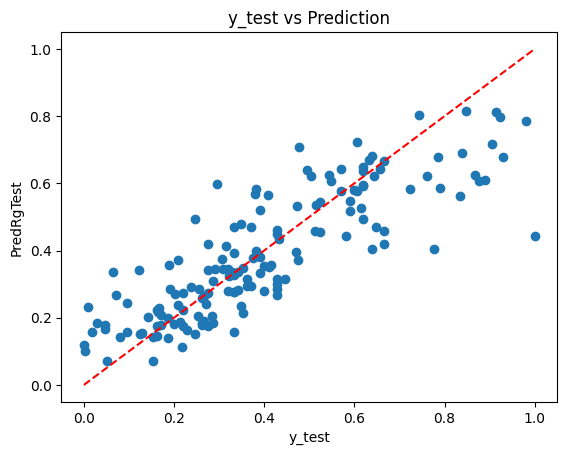

In [ ]:
#To show actual y vs predicted y (L2 Regularisation + Grid Search CV)
#To show the relationship between the actual and predicted price for training
plt.scatter(y_train,predRgTrain)
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()], 'r--')
plt.title('y_train vs Prediction')
plt.xlabel('y_train')
plt.ylabel('PredRgTrain')
plt.show()
print("\n")

#To show relation between actual and predicted price for testing
plt.scatter(y_test,predRgTest)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r--')
plt.title('y_test vs Prediction')
plt.xlabel('y_test')
plt.ylabel('PredRgTest')
plt.show()

**Grid Search CV**

In [ ]:
#State the parameter grid to search
param_grid = {'fit_intercept': [True, False], 'copy_X': [True, False]}

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(regressor, param_grid, cv = 5, scoring='r2')
grid_search.fit(x_train, y_train)

# Evaluate the model on the test set
predGdTrain = grid_search.predict(x_train)
predGdTest = grid_search.predict(x_test)

#Get best mse,rmse,mae.r2
mse = mean_squared_error(y_test, predGdTest)
rmse = nm.sqrt(mse)
mae = nm.mean(nm.abs(y_test - predGdTest))
r2 = grid_search.score(x_test, y_test)

print('After Grid Search CV')
print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best test MSE: {mse:.15f}')
print(f'Best test RMSE: {rmse:.15f}')
print(f'Best test MAE: {mae:.15f}')
print(f'Best test R-squared: {r2:.15f}')

After Grid Search CV
Best hyperparameters: {'copy_X': True, 'fit_intercept': True}
Best test MSE: 0.015840457247998
Best test RMSE: 0.125858878304227
Best test MAE: 0.094233057146956
Best test R-squared: 0.710122683206520


In [ ]:
#Check the evaluation metrics for training set(L2 Regularisation + Grid Search CV)\
print('Grid Search CV')
print('---------------------------------------------------')
print('Training Set Metrics')
print('---------------------------------------------------')
print('R2-Score                       :',round(r2_score(y_train, predGdTrain),15))
print('Residual Sum of Squares (RSS)  :',round(nm.sum(nm.square(y_train - predGdTrain)),15))
print('Mean Squared Error (MSE)       :',round(mean_squared_error(y_train, predGdTrain),15))
print('Root Mean Squared Error (RMSE) :',round(nm.sqrt(mean_squared_error(y_train, predGdTrain)),15))
print('---------------------------------------------------')
print("\n")
#Check the evaluation metrics for test set(L2 Regularisation+ Grid Search CV))
print('---------------------------------------------------')
print('Testing Set Metrics')
print('---------------------------------------------------')
print('R2-Score                       :',round(r2_score(y_test, predGdTest),15))
print('Residual Sum of Squares (RSS)  :',round(nm.sum(nm.square(y_test-predGdTest)),15))
print('Mean Squared Error (MSE)       :',round(mean_squared_error(y_test, predGdTest),15))
print('Root Mean Squared Error (RMSE) :',round(nm.sqrt(mean_squared_error(y_test, predGdTest)),15))

Grid Search CV
---------------------------------------------------
Training Set Metrics
---------------------------------------------------
R2-Score                       : 0.633740768295456
Residual Sum of Squares (RSS)  : 5.751040481223631
Mean Squared Error (MSE)       : 0.015930860058791
Root Mean Squared Error (RMSE) : 0.12621751090396
---------------------------------------------------


---------------------------------------------------
Testing Set Metrics
---------------------------------------------------
R2-Score                       : 0.71012268320652
Residual Sum of Squares (RSS)  : 2.471111330687722
Mean Squared Error (MSE)       : 0.015840457247998
Root Mean Squared Error (RMSE) : 0.125858878304227


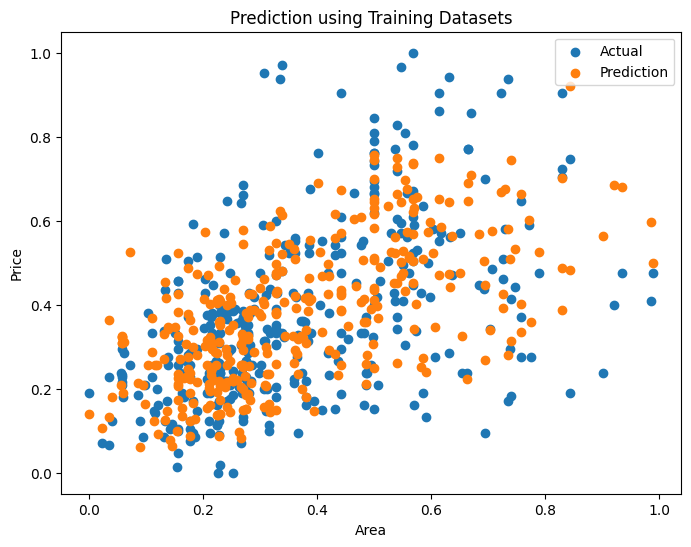

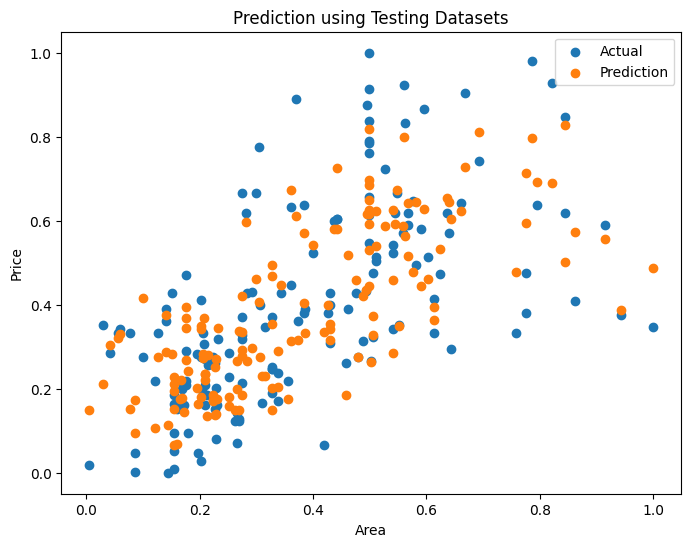

In [ ]:
#Scatter plot to see the comparison between the actual and predicted value after optimisation of hyperparameter
#Training set (Grid Search CV)
plt.figure(figsize=[8,6])
plt.title('Prediction using Training Datasets')
plt.scatter(y = y_train, x = x_train['area'], label = 'Actual')
plt.scatter(y = predGdTrain, x = x_train['area'], label = 'Prediction')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()

print('\n')

#Training set (Grid Search CV)
plt.figure(figsize=[8,6])
plt.title('Prediction using Testing Datasets')
plt.scatter(y = y_test, x = x_test['area'], label = 'Actual')
plt.scatter(y = predGdTest, x = x_test['area'], label = 'Prediction')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()

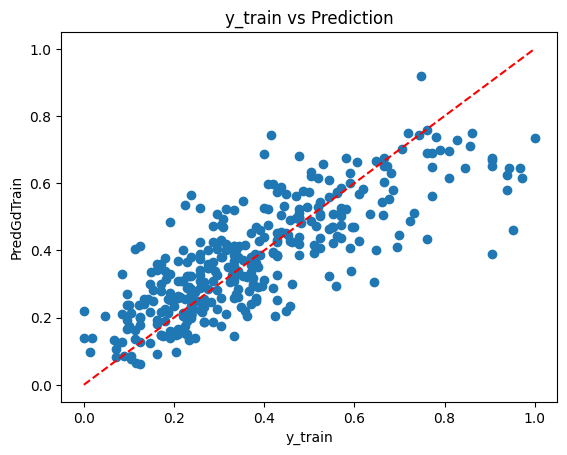

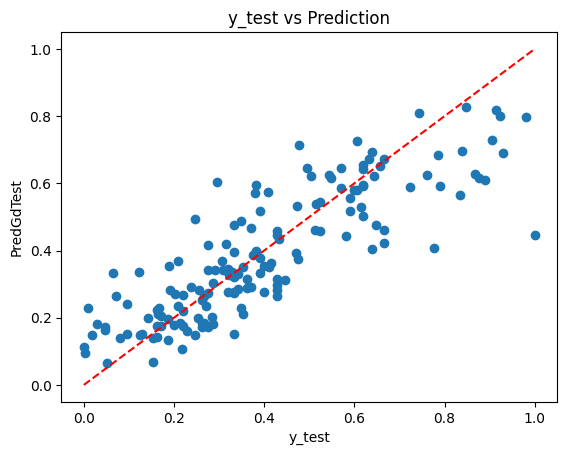

In [ ]:
#To show the actual y vs predicted y (Grid Search CV)
#To show the relationship between actual and predicted price for training
plt.scatter(y_train,predGdTrain)
plt.plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()], 'r--')
plt.title('y_train vs Prediction')
plt.xlabel('y_train')
plt.ylabel('PredGdTrain')
plt.show()
print("\n")

#To show relation between actual and predicted price for testing
plt.scatter(y_test,predGdTest)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'r--')
plt.title('y_test vs Prediction')
plt.xlabel('y_test')
plt.ylabel('PredGdTest')
plt.show()

**SVM**

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
#Create the SVM regression model
svmReg = SVR()

#Set up the hyperparameter grid
param_grid = {'kernel': ['linear', 'rbf'],
              'C': [0.1, 1, 10],
              'epsilon': [0.01, 0.1, 1]}

#Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(svmReg, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(x_train, y_train)

#Use the best model to make predictions with the test data
best_model = grid_search.best_estimator_
predSvmTest = best_model.predict(x_test)
predSvmTrain = best_model.predict(x_train)

#Get best mse,rmse,mae.r2
mse = mean_squared_error(y_test, predSvmTest)
rmse = nm.sqrt(mse)
mae = nm.mean(nm.abs(y_test - predSvmTest))
r2 = grid_search.best_estimator_.score(x_test, y_test)

print('After SVM')
print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best test MSE: {mse:.15f}')
print(f'Best test RMSE: {rmse:.15f}')
print(f'Best test MAE: {mae:.15f}')
print(f'Best test R-squared: {r2:.15f}')


After SVM
Best hyperparameters: {'C': 0.1, 'epsilon': 0.01, 'kernel': 'linear'}
Best test MSE: 0.016156977988191
Best test RMSE: 0.127110101833767
Best test MAE: 0.095375895609655
Best test R-squared: 0.704330414622348


In [ ]:
#Check the evaluation metrics for training set(SVM + Grid Search CV)\
print('SVM')
print('---------------------------------------------------')
print('Training Set Metrics')
print('---------------------------------------------------')
print('R2-Score                       :',round(r2_score(y_train, predSvmTrain),15))
print('Residual Sum of Squares (RSS)  :',round(nm.sum(nm.square(y_train - predSvmTrain)),15))
print('Mean Squared Error (MSE)       :',round(mean_squared_error(y_train, predSvmTrain),15))
print('Root Mean Squared Error (RMSE) :',round(nm.sqrt(mean_squared_error(y_train, predSvmTrain)),15))
print('---------------------------------------------------')
print("\n")
#Check the evaluation metrics for test set(SVM + Grid Search CV))
print('---------------------------------------------------')
print('Testing Set Metrics')
print('---------------------------------------------------')
print('R2-Score                       :',round(r2_score(y_test, predSvmTest),15))
print('Residual Sum of Squares (RSS)  :',round(nm.sum(nm.square(y_test-predSvmTest)),15))
print('Mean Squared Error (MSE)       :',round(mean_squared_error(y_test, predSvmTest),15))
print('Root Mean Squared Error (RMSE) :',round(nm.sqrt(mean_squared_error(y_test, predSvmTest)),15))

SVM
---------------------------------------------------
Training Set Metrics
---------------------------------------------------
R2-Score                       : 0.623852160888391
Residual Sum of Squares (RSS)  : 5.906312421363659
Mean Squared Error (MSE)       : 0.016360976236464
Root Mean Squared Error (RMSE) : 0.127910031805423
---------------------------------------------------


---------------------------------------------------
Testing Set Metrics
---------------------------------------------------
R2-Score                       : 0.704330414622348
Residual Sum of Squares (RSS)  : 2.520488566157754
Mean Squared Error (MSE)       : 0.016156977988191
Root Mean Squared Error (RMSE) : 0.127110101833767


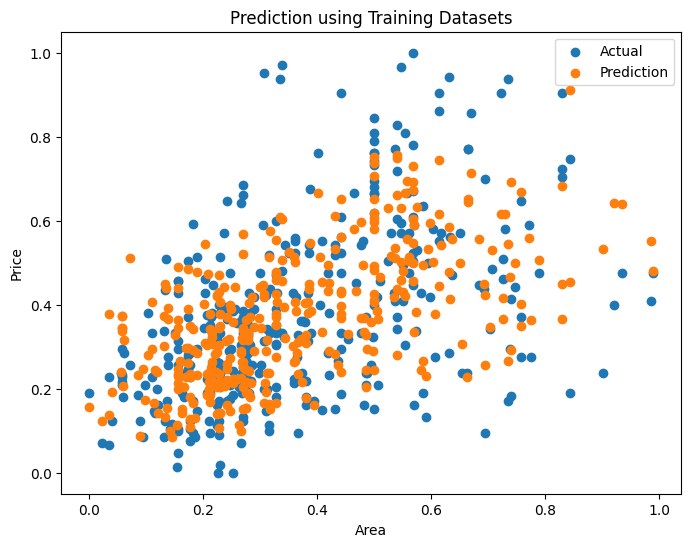

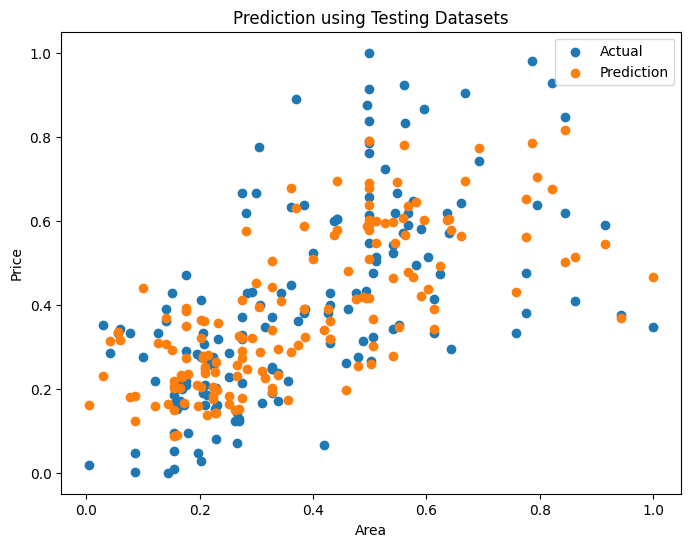

In [ ]:
#Scatter plot to see the comparison between the actual and predicted value after optimisation of hyperparameter
#Training set (SVM)
plt.figure(figsize=[8,6])
plt.title('Prediction using Training Datasets')
plt.scatter(y = y_train, x = x_train['area'], label = 'Actual')
plt.scatter(y = predSvmTrain, x = x_train['area'], label = 'Prediction')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()

print('\n')

#Training set (SVM)
plt.figure(figsize=[8,6])
plt.title('Prediction using Testing Datasets')
plt.scatter(y = y_test, x = x_test['area'], label = 'Actual')
plt.scatter(y = predSvmTest, x = x_test['area'], label = 'Prediction')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()

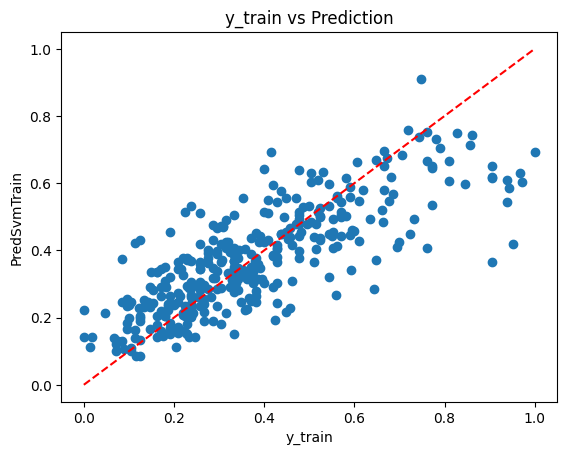

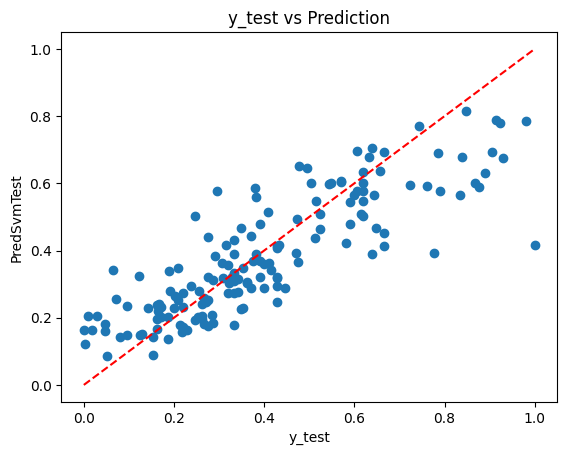

In [ ]:
#To show the actual y vs predicted y (SVM)
#To show the relationship between actual and predicted price for training
plt.scatter(y_train,predSvmTrain)
plt.plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()], 'r--')
plt.title('y_train vs Prediction')
plt.xlabel('y_train')
plt.ylabel('PredSvmTrain')
plt.show()
print("\n")

#To show relation between actual and predicted price for testing
plt.scatter(y_test,predSvmTest)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'r--')
plt.title('y_test vs Prediction')
plt.xlabel('y_test')
plt.ylabel('PredSvmTest')
plt.show()

**Learning Curve**

L1 Regularisation Model

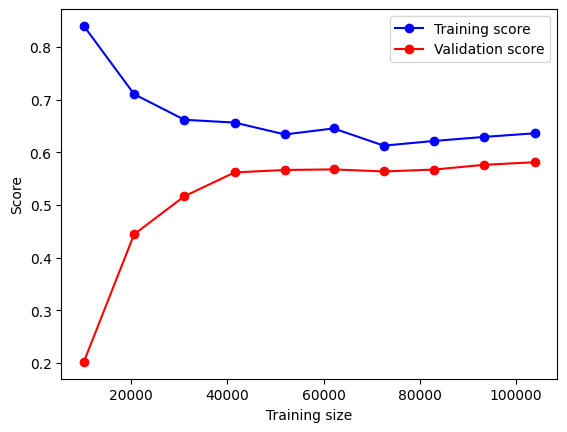

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator = L1, X = x_train, y = y_train, train_sizes = nm.linspace(0.1, 1.0, 10), cv=5)
train_sizes_abs = nm.round(train_sizes * len(x_train))

plt.plot(train_sizes_abs, nm.mean(train_scores, axis=1), 'bo-', label = 'Training score')
plt.plot(train_sizes_abs, nm.mean(test_scores, axis=1), 'ro-', label = 'Validation score')

plt.xlabel('Training size')
plt.ylabel('Score')
plt.legend(loc = 'best')
plt.show()

L2 Regularisation Model

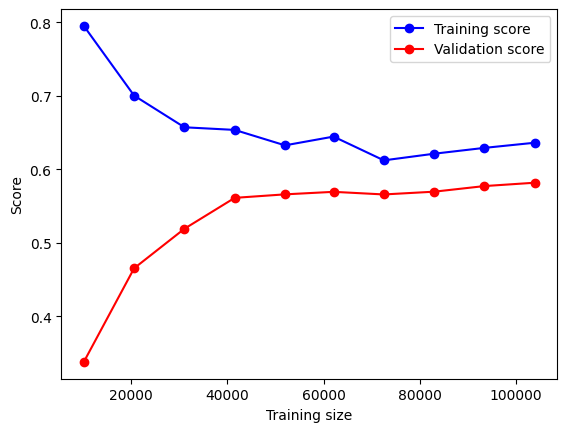

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator = L2, X = x_train, y = y_train, train_sizes = nm.linspace(0.1, 1.0, 10), cv=5)
train_sizes_abs = nm.round(train_sizes * len(x_train))

plt.plot(train_sizes_abs, nm.mean(train_scores, axis=1), 'bo-', label = 'Training score')
plt.plot(train_sizes_abs, nm.mean(test_scores, axis=1), 'ro-', label = 'Validation score')

plt.xlabel('Training size')
plt.ylabel('Score')
plt.legend(loc = 'best')
plt.show()

Grid Search CV Model

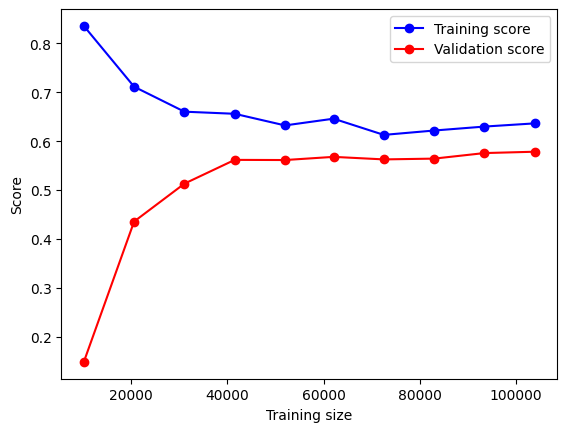

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator = grid_search, X = x_train, y = y_train, train_sizes = nm.linspace(0.1, 1.0, 10), cv=5)
train_sizes_abs = nm.round(train_sizes * len(x_train))

plt.plot(train_sizes_abs, nm.mean(train_scores, axis=1), 'bo-', label = 'Training score')
plt.plot(train_sizes_abs, nm.mean(test_scores, axis=1), 'ro-', label = 'Validation score')

plt.xlabel('Training size')
plt.ylabel('Score')
plt.legend(loc = 'best')
plt.show()

**SVM**

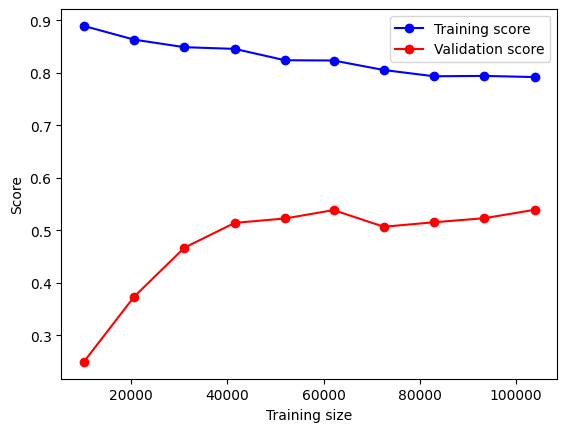

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator = svmReg, X = x_train, y = y_train, train_sizes = nm.linspace(0.1, 1.0, 10), cv=5)
train_sizes_abs = nm.round(train_sizes * len(x_train))

plt.plot(train_sizes_abs, nm.mean(train_scores, axis=1), 'bo-', label = 'Training score')
plt.plot(train_sizes_abs, nm.mean(test_scores, axis=1), 'ro-', label = 'Validation score')

plt.xlabel('Training size')
plt.ylabel('Score')
plt.legend(loc = 'best')
plt.show()

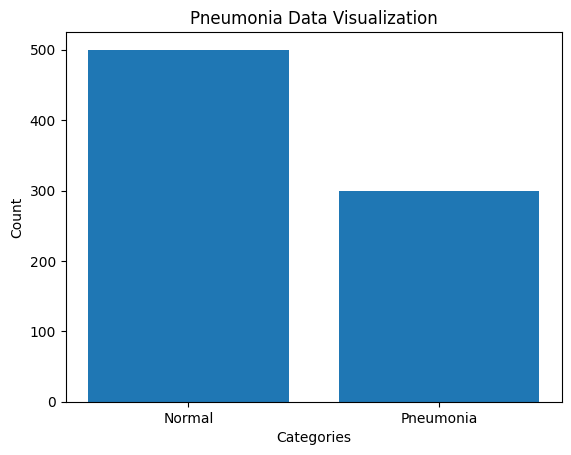

In [ ]:
import matplotlib.pyplot as plt

# Example data
categories = ['Normal', 'Pneumonia']
count = [500, 300]

# Create bar chart
plt.bar(categories, count)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Pneumonia Data Visualization')

# Display the chart
plt.show()